In [1]:
pip install tensorflow keras matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
base_dir = '/kaggle/input/depression/Dataset'
train_dir = os.path.join(base_dir, 'training')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'testsets')


In [4]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=1,
    class_mode='binary',
    shuffle=False
)


Found 16141 images belonging to 2 classes.
Found 2622 images belonging to 2 classes.
Found 2071 images belonging to 2 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


505/505 ━━━━━━━━━━━━━━━━━━━━ 92s 170ms/step - accuracy: 0.6070 - loss: 0.6576 - val_accuracy: 0.7609 - val_loss: 0.5006
Epoch 2/30
505/505 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7571 - loss: 0.5098 - val_accuracy: 0.8028 - val_loss: 0.4314
Epoch 3/30
505/505 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7948 - loss: 0.4425 - val_accuracy: 0.8177 - val_loss: 0.4105
Epoch 4/30
505/505 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.8248 - loss: 0.3844 - val_accuracy: 0.8227 - val_loss: 0.3957
Epoch 5/30
505/505 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8491 - loss: 0.3382 - val_accuracy: 0.8474 - val_loss: 0.3576
Epoch 6/30
505/505 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.8663 - loss: 0.3068 - val_accuracy: 0.8394 - val_loss: 0.3565
Epoch 7/30
505/505 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8789 - loss: 0.2728 - val_accuracy: 0.8532 - val_loss: 0.3436
Epoch 8/30
505/505 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.9013 - loss: 0.2378 - val_accura

In [7]:
 test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


2071/2071 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8855 - loss: 0.5256
Test Accuracy: 86.96%


In [8]:
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


2071/2071 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Confusion Matrix:
[[1064  120]
 [ 150  737]]

Classification Report:
               precision    recall  f1-score   support

    Depressed       0.88      0.90      0.89      1184
Not Depressed       0.86      0.83      0.85       887

     accuracy                           0.87      2071
    macro avg       0.87      0.86      0.87      2071
 weighted avg       0.87      0.87      0.87      2071



In [9]:
model.save('depression_detection_fcn.h5')


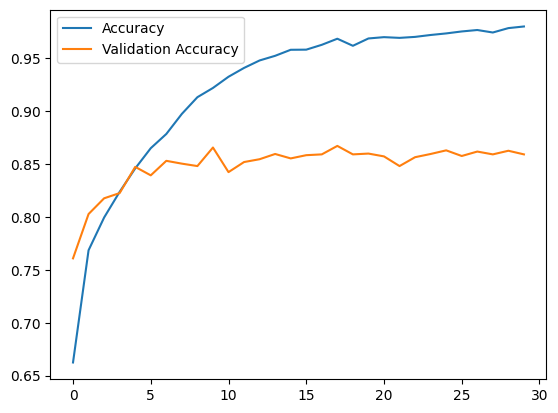

In [10]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()